In [1]:
import numpy as np
import cv2
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import salientregions as sr
import scipy.io as sio

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
SE_size_factor = 0.02
area_factor = 0.03
num_levels = 20
lam_factor = 3
perc = 0.6
connectivity = 8
lam = 27

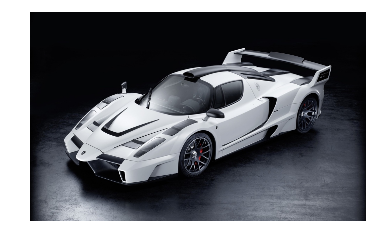

In [9]:
#Load the image
#path_to_image = '../tests/images/Gray/gray.png'
path_to_image = '../tests/images/Gray/gray.png'
img = cv2.imread(path_to_image)
sr.show_image(img)

In [18]:
#our detection object
det = sr.MSSRDetector( min_thres=0, max_thres=255, step=(254/num_levels), perc=perc, SE_size_factor=SE_size_factor,
                 lam_factor=lam_factor,
                 area_factor=area_factor,
                 connectivity=connectivity)

27 27


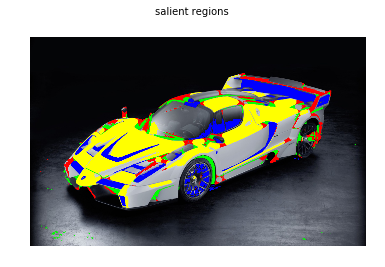

In [19]:
regions = det.detect(img,
                    visualize=False)
assert det.lam == lam
print det.lam, lam
sr.visualize_elements(img, regions=regions);

{'indentations': 97, 'islands': 17, 'holes': 43, 'protrusions': 83}


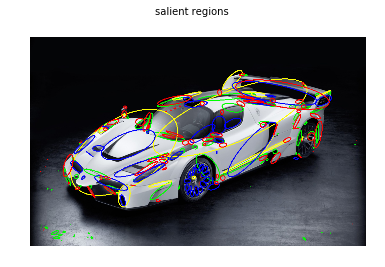

In [20]:
num_regions, features_standard, features_poly = sr.binary_mask2ellipse_features(regions, 
                                                                                connectivity=connectivity)
print(num_regions)
sr.visualize_elements_ellipses(img, features_standard);

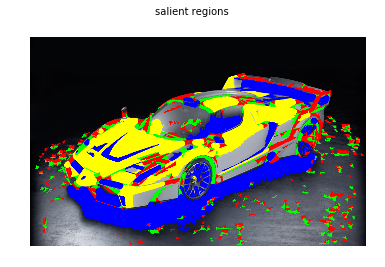

{'indentations': 168, 'islands': 14, 'holes': 38, 'protrusions': 189}


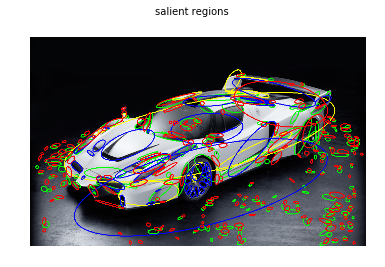

In [17]:
holes_true, islands_true, indents_true,  prots_true = \
    sr.read_matfile('../tests/images/Gray/gray_mssra_regions.mat', visualize=False)
regions_mssr = {"holes": holes_true, "islands": islands_true, 
                "indentations": indents_true, "protrusions":prots_true}
sr.visualize_elements(img, regions_mssr);
num_regions_mssr, features_standard_mssr, features_poly_mssr = sr.binary_mask2ellipse_features(regions_mssr,
                                                                                connectivity=connectivity)
print(num_regions_mssr)
sr.visualize_elements_ellipses(img, features_standard_mssr);

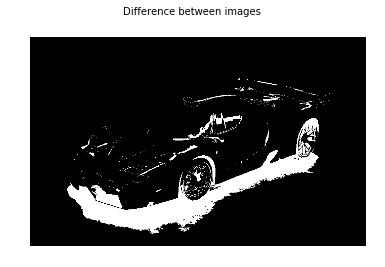

False


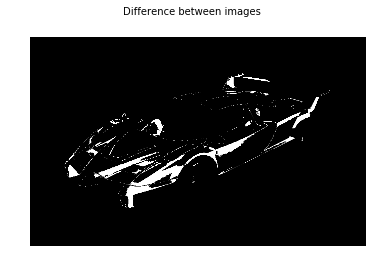

False


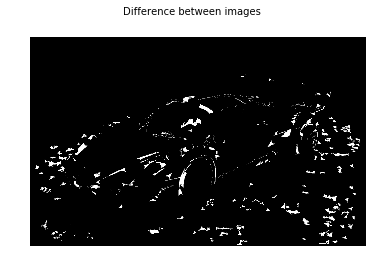

False


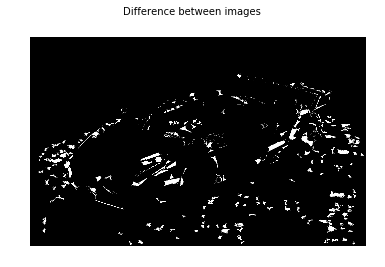

False


In [21]:
print sr.image_diff(regions['holes'], holes_true)
print sr.image_diff(regions['islands'], islands_true)
print sr.image_diff(regions['indentations'], indents_true)
print sr.image_diff(regions['protrusions'], prots_true)

In [ ]:
sr.show_image(regions['indentations'], "our indentiations")
sr.show_image(indents_true, "matlab indentations")
sr.show_image(regions['protrusions'], "our protrusions")
sr.show_image(prots_true, "matlab protrusions")
#print sr.image_diff(regions['indentations'], prots_true)
#print sr.image_diff(regions['protrusions'], indents_true)